---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
  -
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>  -
  - **7.1** [**Feature Selection using Random Forest**](#Section72)<br>
  - **7.2** [**Data Preparation**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Random Forest - Baseline Model**](#Section81)<br>


**9.** [**Conclusion**](#Section9)<br>



---
<a name = Section1></a>
# **1. Introduction**
---

**Company Introduction**
- Your client for this project is an Airline Company.

- Due to fierce competition in the airline industry, the airline company needs to focus on the passenger’s experience and satisfaction.
- Customer feedback, in particular, is critical since it is an outcome measurement for business performance.
- So, they need to analyze the data of the passenger's travel history.
- One of the key measurements in this process is whether the passenger feels satisfied or not.

**Current Scenario**
- Currently, they have a manual process to analyze the customer satisfaction based on the number of feedback and complaint mail that they receive.

---
<a name = Section2></a>
# **2. Problem Statement**
---

**The current process suffers from the following problems**:

- Analyzing the data of passengers manually and to understand whether a passenger is satisfied or not is a tedious task.
- This process needs to be repeated every time they receive some feedback.

The company has hired you as data science consultants.

They want to automate the process of predicting the passenger satisfaction based on the travel history data collected by the airline company.

**Your Role**
- You are given a dataset containing the answer of different questions asked as the feedback.
- Your task is to build a classification model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

**Project Deliverables**
- Deliverable: Predict whether the customer is satisfied or not..
- Machine Learning Task: Classification
- Target Variable: satisfaction
- Win Condition: N/A (best possible model)

**Evaluation Metric**
- The model evaluation will be based on the Accuracy score.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

In [2]:
!pip install -q datascience                   
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip               
!pip install -q yellowbrick                   

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [3]:
!pip install -q --upgrade yellowbrick

<a name = Section33></a>
### **3.3 Importing Libraries**

In [64]:
import pandas as pd                                                               # Importing for panel data analysis
from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                                        # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                                       # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                                           # Unfolding hidden data points if the cardinality is high
pd.set_option('display.float_format', lambda x: '%.5f' % x)                       # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                                # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                   # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                                             # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part 
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing.                             
from sklearn.linear_model import LinearRegression                                 # Importing Linear Regression model
from sklearn.metrics import mean_squared_error                                    # To calculate the MSE of a regression model
from sklearn.metrics import mean_absolute_error                                   # To calculate the MAE of a regression model
from sklearn.metrics import r2_score                                              # To calculate the R-squared score of a regression model
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from random import randint                                          # Importing to generate random integers
from sklearn.preprocessing import StandardScaler                    # Importing standard scaler to perform standardization
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
 
from sklearn.naive_bayes import GaussianNB                          # To create a naive bayes model using algorithm
from sklearn.ensemble import RandomForestClassifier                 # To create a random forest model using algorithm
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
from yellowbrick.model_selection import FeatureImportances

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset consists of information of passenger boarding and deboarding information and the services provided during the travel in flight.

- The column **satisfaction** is also present in the dataset which is a measure of the overall satisfaction.

- This is the data that we have to predict for future samples.




| Id | Column Name| Description|
| :-- | :--| :--| 
|01| **Id** | Unique Id |
|02| **Gender** | Gender of the Passenger | 
|03|**Customer Type**|If the customer is loyal or disloyal|
|04|**Age**|Age of the customer|
|05|**Type of Travel**|If the travel is for a business or a personal purpose|
|06|**Class**|Class of the aircraft in which the customer is travelling|
|07|**Flight Distance**|Distance covered by the flight|
|08|**Inflight wifi service**|If there is inflight wifi service or not|
|09|**Departure/Arrival time convenient**|Rating by the customer for Departure/Arrival Time|
|10|**Ease of Online booking**|Rating by the customer for this facility|
|11|**Gate location**|Rating by the customer for this facility|
|12|**Food and drink**|Rating by the customer for this facility|
|13|**Online boarding**|Rating by the customer for this facility|
|14|**Seat comfort**|Rating by the customer for this facility|
|15|**Inflight entertainment**|Rating by the customer for this facility|
|16|**On-board service**|Rating by the customer for this facility|
|17|**Leg room service**|Rating by the customer for this facility|
|18|**Baggage handling**|Rating by the customer for this facility|
|19|**Checkin service**|Rating by the customer for this facility|
|20|**Inflight service**|Rating by the customer for this facility|
|21|**Cleanliness**|Rating by the customer for this facility|
|22|**Departure Delay in Minutes**|Rating by the customer for this facility|
|23|**Arrival Delay in Minutes**|Rating by the customer for this facility|
|24|**satisfaction**|If the passenger is satisfied or not|

In [7]:
# Import Train Data
cust_train = pd.read_csv(r'C:\Users\vc00482003\Desktop\INSAIDclassdocs\ML\ML_Term5_Project\cust_train.csv')
print('Data Shape:', cust_train.shape)
cust_train.head()

Data Shape: (83123, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,51032,Female,Loyal Customer,30,Personal Travel,Eco,193,3,4,0,3,5,0,5,5,4,5,3,4,4,5,0,0.00000,neutral or dissatisfied
1,54504,Female,Loyal Customer,51,Business travel,Eco,925,2,1,1,1,5,3,2,2,2,2,2,3,2,3,47,29.00000,neutral or dissatisfied
2,13387,Male,disloyal Customer,27,Business travel,Eco,505,0,0,0,4,1,0,1,1,5,5,2,3,2,1,0,0.00000,satisfied
3,17388,Female,Loyal Customer,52,Business travel,Business,2953,2,2,2,2,3,4,5,5,5,5,5,4,5,5,10,2.00000,satisfied
4,91598,Female,disloyal Customer,15,Business travel,Eco,1352,4,4,4,2,2,4,2,2,4,3,5,3,5,2,0,0.00000,satisfied


In [8]:
# import Test data
cust_test = pd.read_csv(r'C:\Users\vc00482003\Desktop\INSAIDclassdocs\ML\ML_Term5_Project\cust_test.csv')
print('Data Shape:', cust_test.shape)
cust_test.head()

Data Shape: (20781, 23)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,23509,Male,Loyal Customer,41,Business travel,Eco,303,5,3,3,3,5,5,5,5,4,3,3,5,5,5,0,0.00000
1,31011,Female,Loyal Customer,18,Business travel,Business,391,1,5,5,5,1,1,1,1,4,3,3,1,4,1,17,17.00000
2,29345,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,2,3,1,2,1,1,5,4,4,5,5,1,0,0.00000
3,50242,Male,disloyal Customer,23,Business travel,Eco,109,1,0,1,1,3,1,1,3,2,5,5,3,1,3,0,0.00000
4,22244,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,0,3,5,0,5,5,3,5,4,3,5,5,0,0.00000


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [9]:
# Describe Train data
cust_train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,83123.00000,82872.00000
mean,64971.53957,39.35111,1190.68675,2.73255,3.06227,2.75639,2.97806,3.20529,3.25284,3.44279,3.36299,3.38364,3.35141,3.63431,3.30819,3.64387,3.29135,14.71456,15.06312
std,37465.88672,15.09949,998.64002,1.32995,1.52698,1.40105,1.27906,1.33048,1.35090,1.31832,1.33188,1.28778,1.31336,1.17893,1.26475,1.17335,1.31356,38.10887,38.47549
min,1.00000,7.00000,31.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,32552.50000,27.00000,413.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,3.00000,3.00000,3.00000,2.00000,0.00000,0.00000
50%,64864.00000,40.00000,844.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,4.00000,4.00000,4.00000,4.00000,4.00000,3.00000,4.00000,3.00000,0.00000,0.00000
75%,97430.50000,51.00000,1744.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,5.00000,4.00000,4.00000,4.00000,5.00000,4.00000,5.00000,4.00000,12.00000,13.00000
max,129880.00000,85.00000,4983.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,1592.00000,1584.00000


In [10]:
# Check Skewness Train data
cust_train.skew()

C:\Users\vc00482003\AppData\Local\Temp\ipykernel_12304\1738673280.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cust_train.skew()


id                                   0.00226
Age                                 -0.00655
Flight Distance                      1.10866
Inflight wifi service                0.03867
Departure/Arrival time convenient   -0.33550
Ease of Online booking              -0.01820
Gate location                       -0.05940
Food and drink                      -0.15269
Online boarding                     -0.45768
Seat comfort                        -0.48634
Inflight entertainment              -0.36741
On-board service                    -0.41973
Leg room service                    -0.34938
Baggage handling                    -0.67772
Checkin service                     -0.36786
Inflight service                    -0.69174
Cleanliness                         -0.30293
Departure Delay in Minutes           6.98006
Arrival Delay in Minutes             6.82992
dtype: float64

In [11]:
# Check Skewness Test data
cust_test.skew()

C:\Users\vc00482003\AppData\Local\Temp\ipykernel_12304\1392101848.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cust_test.skew()


id                                   0.00526
Age                                  0.00328
Flight Distance                      1.11260
Inflight wifi service                0.04709
Departure/Arrival time convenient   -0.33015
Ease of Online booking              -0.01863
Gate location                       -0.05696
Food and drink                      -0.14582
Online boarding                     -0.43857
Seat comfort                        -0.46859
Inflight entertainment              -0.35593
On-board service                    -0.42120
Leg room service                    -0.35348
Baggage handling                    -0.67406
Checkin service                     -0.35350
Inflight service                    -0.68425
Cleanliness                         -0.28909
Departure Delay in Minutes           5.79387
Arrival Delay in Minutes             5.73346
dtype: float64

- Data skewness is high for **Departure & Arrival delay** variables. Apart from that data apears to be moderately skewed. Also these two variables have outliers but we will let our Random Forest variable selector take care of it.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [12]:
# Check Train Data info
cust_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

- Train data has **251** missing values for variable **Arrival Delay in Minutes**. We will impute missing values with median during data pre-processing
- Other variables do not have any missing values.

In [13]:
# Check Test Data info
cust_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 20781 non-null  int64  
 1   Gender                             20781 non-null  object 
 2   Customer Type                      20781 non-null  object 
 3   Age                                20781 non-null  int64  
 4   Type of Travel                     20781 non-null  object 
 5   Class                              20781 non-null  object 
 6   Flight Distance                    20781 non-null  int64  
 7   Inflight wifi service              20781 non-null  int64  
 8   Departure/Arrival time convenient  20781 non-null  int64  
 9   Ease of Online booking             20781 non-null  int64  
 10  Gate location                      20781 non-null  int64  
 11  Food and drink                     20781 non-null  int

- Test data has **59** missing values for variable **Arrival Delay in Minutes**. We will impute missing values with median during data pre-processing

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [14]:
# Creating pandas profile for the main dataset of training
profile = ProfileReport(cust_train, title="Flight Passenger Services Information", html={'style':{'full_width':True}})

In [15]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# Check for missing values in Train Data
#Creating a New dataframe
missing_frame = pd.DataFrame(index = cust_train.columns.values) 

#Adding a column in the newly created dataframe
missing_frame['Null Frequency'] = cust_train.isnull().sum().values

#Calculating the percentage of null values
nullpercent = cust_train.isnull().sum().values/cust_train.shape[0]

#Rounding the percentage of missing values and adding it to the dataFrame
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100

#Counting the number of 0 value present and adding it to the column in our dataFrame
missing_frame['Zero Frequency'] = cust_train[cust_train == 0].count().values

#Calculating the Percentage of Zero
zero_percent = cust_train[cust_train == 0].count().values / cust_train.shape[0]

#Rounding and adding a column the dataframe which consists of the percent of 0 value present.
missing_frame['Missing Zero %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,251.00000,0.00000
Missing Null %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.30000,0.00000
Zero Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2487.00000,4237.00000,3604.00000,1.00000,88.00000,1959.00000,1.00000,9.00000,1.00000,371.00000,0.00000,1.00000,1.00000,9.00000,46977.00000,46553.00000,0.00000
Missing Zero %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.99000,5.10000,4.34000,0.00000,0.11000,2.36000,0.00000,0.01000,0.00000,0.45000,0.00000,0.00000,0.00000,0.01000,56.52000,56.00000,0.00000


-  Drop ID as its least correlated plus only needed during final submission
- Customer rating variabes have lot of zero values. That is fine as zero ratings indicate customers are not happy
- Arrival Time delay has **251** missing values. 

In [17]:
# Check for missing values in Test Data
#Creating a New dataframe
missing_frame = pd.DataFrame(index = cust_test.columns.values) 

#Adding a column in the newly created dataframe
missing_frame['Null Frequency'] = cust_test.isnull().sum().values

#Calculating the percentage of null values
nullpercent = cust_test.isnull().sum().values/cust_test.shape[0]

#Rounding the percentage of missing values and adding it to the dataFrame
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100

#Counting the number of 0 value present and adding it to the column in our dataFrame
missing_frame['Zero Frequency'] = cust_test[cust_test == 0].count().values

#Calculating the Percentage of Zero
zero_percent = cust_test[cust_test == 0].count().values / cust_train.shape[0]

#Rounding and adding a column the dataframe which consists of the percent of 0 value present.
missing_frame['Missing Zero %age'] = np.round(zero_percent, decimals = 4) * 100
missing_frame.transpose()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Null Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,59.00000
Missing Null %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.28000
Zero Frequency,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,616.00000,1063.00000,883.00000,0.00000,19.00000,469.00000,0.00000,5.00000,2.00000,101.00000,0.00000,0.00000,2.00000,3.00000,11691.00000,11606.00000
Missing Zero %age,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.74000,1.28000,1.06000,0.00000,0.02000,0.56000,0.00000,0.01000,0.00000,0.12000,0.00000,0.00000,0.00000,0.00000,14.06000,13.96000


-  Drop ID as its least correlated plus only needed during final submission
- Customer rating variabes have lot of zero values. That is fine as zero ratings indicate customers are not happy
- Arrival Time delay has **59** missing values. 

In [20]:
# check for duplicate values for both train & test data
# Selecting duplicate rows except first
# occurrence based on all columns
train_duplicate = cust_train[cust_train.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
train_duplicate

#Check Test Data duplicates 
test_duplicate = cust_test[cust_test.duplicated()]
print("Duplicate Rows :")
# Print the resultant Dataframe
test_duplicate
# No duplicates observed in both train & test data

Duplicate Rows :
Duplicate Rows :


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes


In [21]:
# Impute Missing values for Train & Test data with Median
# Impute missing values
def data_prep(df):
   df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes'].isna(), df['Arrival Delay in Minutes'].median(skipna=True), df['Arrival Delay in Minutes'])
   return df

In [22]:
cust_train = data_prep(cust_train)

In [23]:
cust_test = data_prep(cust_test)

In [24]:
# Check Train Data info after imputing( No missing values)
cust_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 83123 non-null  int64  
 1   Gender                             83123 non-null  object 
 2   Customer Type                      83123 non-null  object 
 3   Age                                83123 non-null  int64  
 4   Type of Travel                     83123 non-null  object 
 5   Class                              83123 non-null  object 
 6   Flight Distance                    83123 non-null  int64  
 7   Inflight wifi service              83123 non-null  int64  
 8   Departure/Arrival time convenient  83123 non-null  int64  
 9   Ease of Online booking             83123 non-null  int64  
 10  Gate location                      83123 non-null  int64  
 11  Food and drink                     83123 non-null  int

In [25]:
# Check Test Data info after imputing( No missing values)
cust_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 20781 non-null  int64  
 1   Gender                             20781 non-null  object 
 2   Customer Type                      20781 non-null  object 
 3   Age                                20781 non-null  int64  
 4   Type of Travel                     20781 non-null  object 
 5   Class                              20781 non-null  object 
 6   Flight Distance                    20781 non-null  int64  
 7   Inflight wifi service              20781 non-null  int64  
 8   Departure/Arrival time convenient  20781 non-null  int64  
 9   Ease of Online booking             20781 non-null  int64  
 10  Gate location                      20781 non-null  int64  
 11  Food and drink                     20781 non-null  int

In [26]:
# divide train data into categorical & continuous variabes before standardization
cust_train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [41]:
# Filter Categorical variables
cust_train_cat = cust_train[['Gender', 'Customer Type','Type of Travel','Class','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Leg room service','Inflight entertainment','On-board service','Baggage handling','Checkin service','Inflight service','Cleanliness','satisfaction']]
print('Data Shape:', cust_train_cat.shape)
cust_train_cat.head()


Data Shape: (83123, 19)


,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Leg room service,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Female,Loyal Customer,Personal Travel,Eco,3,4,0,3,5,0,5,5,5,4,3,4,4,5,neutral or dissatisfied
1,Female,Loyal Customer,Business travel,Eco,2,1,1,1,5,3,2,2,2,2,2,3,2,3,neutral or dissatisfied
2,Male,disloyal Customer,Business travel,Eco,0,0,0,4,1,0,1,5,1,5,2,3,2,1,satisfied
3,Female,Loyal Customer,Business travel,Business,2,2,2,2,3,4,5,5,5,5,5,4,5,5,satisfied
4,Female,disloyal Customer,Business travel,Eco,4,4,4,2,2,4,2,3,2,4,5,3,5,2,satisfied


In [40]:
# Filter Categorical variables
cust_train_con = cust_train[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
print('Data Shape:', cust_train_con.shape)
cust_train_con.head()


Data Shape: (83123, 4)


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,30,193,0,0.00000
1,51,925,47,29.00000
2,27,505,0,0.00000
3,52,2953,10,2.00000
4,15,1352,0,0.00000


In [42]:
# divide test data into categorical & continuous variabes before standardization
cust_test.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [43]:
# Filter Categorical variables
cust_test_cat = cust_test[[ 'Gender', 'Customer Type','Type of Travel','Class','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Leg room service','Inflight entertainment','On-board service','Baggage handling','Checkin service','Inflight service','Cleanliness']]
print('Data Shape:', cust_test_cat.shape)
cust_test_cat.head()

Data Shape: (20781, 18)


,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Leg room service,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Male,Loyal Customer,Business travel,Eco,5,3,3,3,5,5,5,3,5,4,3,5,5,5
1,Female,Loyal Customer,Business travel,Business,1,5,5,5,1,1,1,3,1,4,3,1,4,1
2,Female,Loyal Customer,Personal Travel,Eco Plus,2,4,2,3,1,2,1,4,1,5,4,5,5,1
3,Male,disloyal Customer,Business travel,Eco,1,0,1,1,3,1,1,5,3,2,5,3,1,3
4,Male,Loyal Customer,Personal Travel,Business,4,5,0,3,5,0,5,5,5,3,4,3,5,5


In [44]:
# Filter Continuous variables
cust_test_con = cust_test[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]
print('Data Shape:', cust_test_con.shape)
cust_test_con.head()


Data Shape: (20781, 4)


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,41,303,0,0.00000
1,18,391,17,17.00000
2,13,569,0,0.00000
3,23,109,0,0.00000
4,23,83,0,0.00000


In [47]:
cust_train_cat.columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Leg room service',
       'Inflight entertainment', 'On-board service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [48]:
# Label Encoding of Categorical Trian data
def encode(df):
  le = LabelEncoder()
  df['Gender'] = le.fit_transform(df['Gender'])
  df['Customer Type'] = le.fit_transform(df['Customer Type'])
  df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
  df['Class'] = le.fit_transform(df['Class'])
  df['Inflight wifi service'] = le.fit_transform(df['Inflight wifi service'])
  df['Departure/Arrival time convenient'] = le.fit_transform(df['Departure/Arrival time convenient'])
  df['Ease of Online booking'] = le.fit_transform(df['Ease of Online booking'])
  df['Gate location'] = le.fit_transform(df['Gate location'])
  df['Food and drink'] = le.fit_transform(df['Food and drink'])
  df['Online boarding'] = le.fit_transform(df['Online boarding'])
  df['Seat comfort'] = le.fit_transform(df['Seat comfort'])
  df['Leg room service'] = le.fit_transform(df['Leg room service'])
  df['Inflight entertainment'] = le.fit_transform(df['Inflight entertainment'])
  df['On-board service'] = le.fit_transform(df['On-board service'])
  df['Baggage handling'] = le.fit_transform(df['Baggage handling'])
  df['Checkin service'] = le.fit_transform(df['Checkin service'])
  df['Inflight service'] = le.fit_transform(df['Inflight service'])
  df['Cleanliness'] = le.fit_transform(df['Cleanliness'])
  df['satisfaction'] = le.fit_transform(df['satisfaction'])
  return df

In [49]:
cust_train_cat = encode(cust_train_cat)
cust_train_cat.head()

C:\Users\vc00482003\AppData\Local\Temp\ipykernel_12304\2135156798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])
C:\Users\vc00482003\AppData\Local\Temp\ipykernel_12304\2135156798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer Type'] = le.fit_transform(df['Customer Type'])
C:\Users\vc00482003\AppData\Local\Temp\ipykernel_12304\2135156798.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Leg room service,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0,0,1,1,3,4,0,3,5,0,5,5,5,4,2,4,4,5,0
1,0,0,0,1,2,1,1,1,5,3,2,2,2,2,1,3,2,3,0
2,1,1,0,1,0,0,0,4,1,0,1,5,1,5,1,3,2,1,1
3,0,0,0,0,2,2,2,2,3,4,5,5,5,5,4,4,5,5,1
4,0,1,0,1,4,4,4,2,2,4,2,3,2,4,4,3,5,2,1


In [50]:
# Label Encoding of Categorical Test data
def encode(df):
  le = LabelEncoder()
  df['Gender'] = le.fit_transform(df['Gender'])
  df['Customer Type'] = le.fit_transform(df['Customer Type'])
  df['Type of Travel'] = le.fit_transform(df['Type of Travel'])
  df['Class'] = le.fit_transform(df['Class'])
  df['Inflight wifi service'] = le.fit_transform(df['Inflight wifi service'])
  df['Departure/Arrival time convenient'] = le.fit_transform(df['Departure/Arrival time convenient'])
  df['Ease of Online booking'] = le.fit_transform(df['Ease of Online booking'])
  df['Gate location'] = le.fit_transform(df['Gate location'])
  df['Food and drink'] = le.fit_transform(df['Food and drink'])
  df['Online boarding'] = le.fit_transform(df['Online boarding'])
  df['Seat comfort'] = le.fit_transform(df['Seat comfort'])
  df['Leg room service'] = le.fit_transform(df['Leg room service'])
  df['Inflight entertainment'] = le.fit_transform(df['Inflight entertainment'])
  df['On-board service'] = le.fit_transform(df['On-board service'])
  df['Baggage handling'] = le.fit_transform(df['Baggage handling'])
  df['Checkin service'] = le.fit_transform(df['Checkin service'])
  df['Inflight service'] = le.fit_transform(df['Inflight service'])
  df['Cleanliness'] = le.fit_transform(df['Cleanliness'])
  return df

In [51]:
cust_test_cat = encode(cust_test_cat)
cust_test_cat.head()

C:\Users\vc00482003\AppData\Local\Temp\ipykernel_12304\3659285421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = le.fit_transform(df['Gender'])
C:\Users\vc00482003\AppData\Local\Temp\ipykernel_12304\3659285421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer Type'] = le.fit_transform(df['Customer Type'])
C:\Users\vc00482003\AppData\Local\Temp\ipykernel_12304\3659285421.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Leg room service,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,0,0,1,5,3,3,2,5,5,4,3,5,4,2,4,5,5
1,0,0,0,0,1,5,5,4,1,1,0,3,1,4,2,0,4,1
2,0,0,1,2,2,4,2,2,1,2,0,4,1,5,3,4,5,1
3,1,1,0,1,1,0,1,0,3,1,0,5,3,2,4,2,1,3
4,1,0,1,0,4,5,0,2,5,0,4,5,5,3,3,2,5,5


In [52]:
# Scaling the continuous variables for train & test data
cust_train_con.columns

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [53]:
scaled_cust_train_con = np.log1p(cust_train_con) 
scaled_cust_train_con.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,3.43399,5.26786,0.00000,0.00000
1,3.95124,6.83087,3.87120,3.40120
2,3.33220,6.22654,0.00000,0.00000
3,3.97029,7.99092,2.39790,1.09861
4,2.77259,7.21008,0.00000,0.00000


In [54]:
scaled_cust_test_con = np.log1p(cust_test_con) 
scaled_cust_test_con.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,3.73767,5.71703,0.00000,0.00000
1,2.94444,5.97126,2.89037,2.89037
2,2.63906,6.34564,0.00000,0.00000
3,3.17805,4.70048,0.00000,0.00000
4,3.17805,4.43082,0.00000,0.00000


In [55]:
# Concatenate continuous & categorical variables for train Data

new_cust_train = pd.concat([scaled_cust_train_con,cust_train_cat], axis=1)
print('Data Shape:', new_cust_train.shape)
new_cust_train.head()

Data Shape: (83123, 23)


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Leg room service,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,3.43399,5.26786,0.00000,0.00000,0,0,1,1,3,4,0,3,5,0,5,5,5,4,2,4,4,5,0
1,3.95124,6.83087,3.87120,3.40120,0,0,0,1,2,1,1,1,5,3,2,2,2,2,1,3,2,3,0
2,3.33220,6.22654,0.00000,0.00000,1,1,0,1,0,0,0,4,1,0,1,5,1,5,1,3,2,1,1
3,3.97029,7.99092,2.39790,1.09861,0,0,0,0,2,2,2,2,3,4,5,5,5,5,4,4,5,5,1
4,2.77259,7.21008,0.00000,0.00000,0,1,0,1,4,4,4,2,2,4,2,3,2,4,4,3,5,2,1


In [56]:
# Concatenate continuous & categorical variables for test Data
new_cust_test = pd.concat([scaled_cust_test_con,cust_test_cat], axis=1)
print('Data Shape:', new_cust_test.shape)
new_cust_test.head()


Data Shape: (20781, 22)


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Leg room service,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3.73767,5.71703,0.00000,0.00000,1,0,0,1,5,3,3,2,5,5,4,3,5,4,2,4,5,5
1,2.94444,5.97126,2.89037,2.89037,0,0,0,0,1,5,5,4,1,1,0,3,1,4,2,0,4,1
2,2.63906,6.34564,0.00000,0.00000,0,0,1,2,2,4,2,2,1,2,0,4,1,5,3,4,5,1
3,3.17805,4.70048,0.00000,0.00000,1,1,0,1,1,0,1,0,3,1,0,5,3,2,4,2,1,3
4,3.17805,4.43082,0.00000,0.00000,1,0,1,0,4,5,0,2,5,0,4,5,5,3,3,2,5,5


In [57]:
new_cust_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83123 entries, 0 to 83122
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                83123 non-null  float64
 1   Flight Distance                    83123 non-null  float64
 2   Departure Delay in Minutes         83123 non-null  float64
 3   Arrival Delay in Minutes           83123 non-null  float64
 4   Gender                             83123 non-null  int32  
 5   Customer Type                      83123 non-null  int32  
 6   Type of Travel                     83123 non-null  int32  
 7   Class                              83123 non-null  int32  
 8   Inflight wifi service              83123 non-null  int64  
 9   Departure/Arrival time convenient  83123 non-null  int64  
 10  Ease of Online booking             83123 non-null  int64  
 11  Gate location                      83123 non-null  int

In [58]:
new_cust_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20781 entries, 0 to 20780
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                20781 non-null  float64
 1   Flight Distance                    20781 non-null  float64
 2   Departure Delay in Minutes         20781 non-null  float64
 3   Arrival Delay in Minutes           20781 non-null  float64
 4   Gender                             20781 non-null  int32  
 5   Customer Type                      20781 non-null  int32  
 6   Type of Travel                     20781 non-null  int32  
 7   Class                              20781 non-null  int32  
 8   Inflight wifi service              20781 non-null  int64  
 9   Departure/Arrival time convenient  20781 non-null  int64  
 10  Ease of Online booking             20781 non-null  int64  
 11  Gate location                      20781 non-null  int

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

<AxesSubplot:>

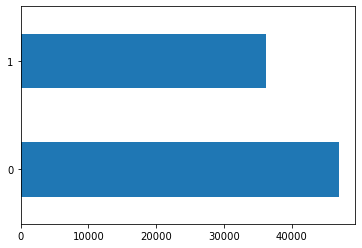

In [59]:
# check the categories of customer satisfaction and see to what extent data is balanced
new_cust_train['satisfaction'].value_counts().plot(kind='barh')
# The rate of customers not satisfied is higher than the ones who are satisfied

Text(0.5, 1.0, 'Correlation between features')

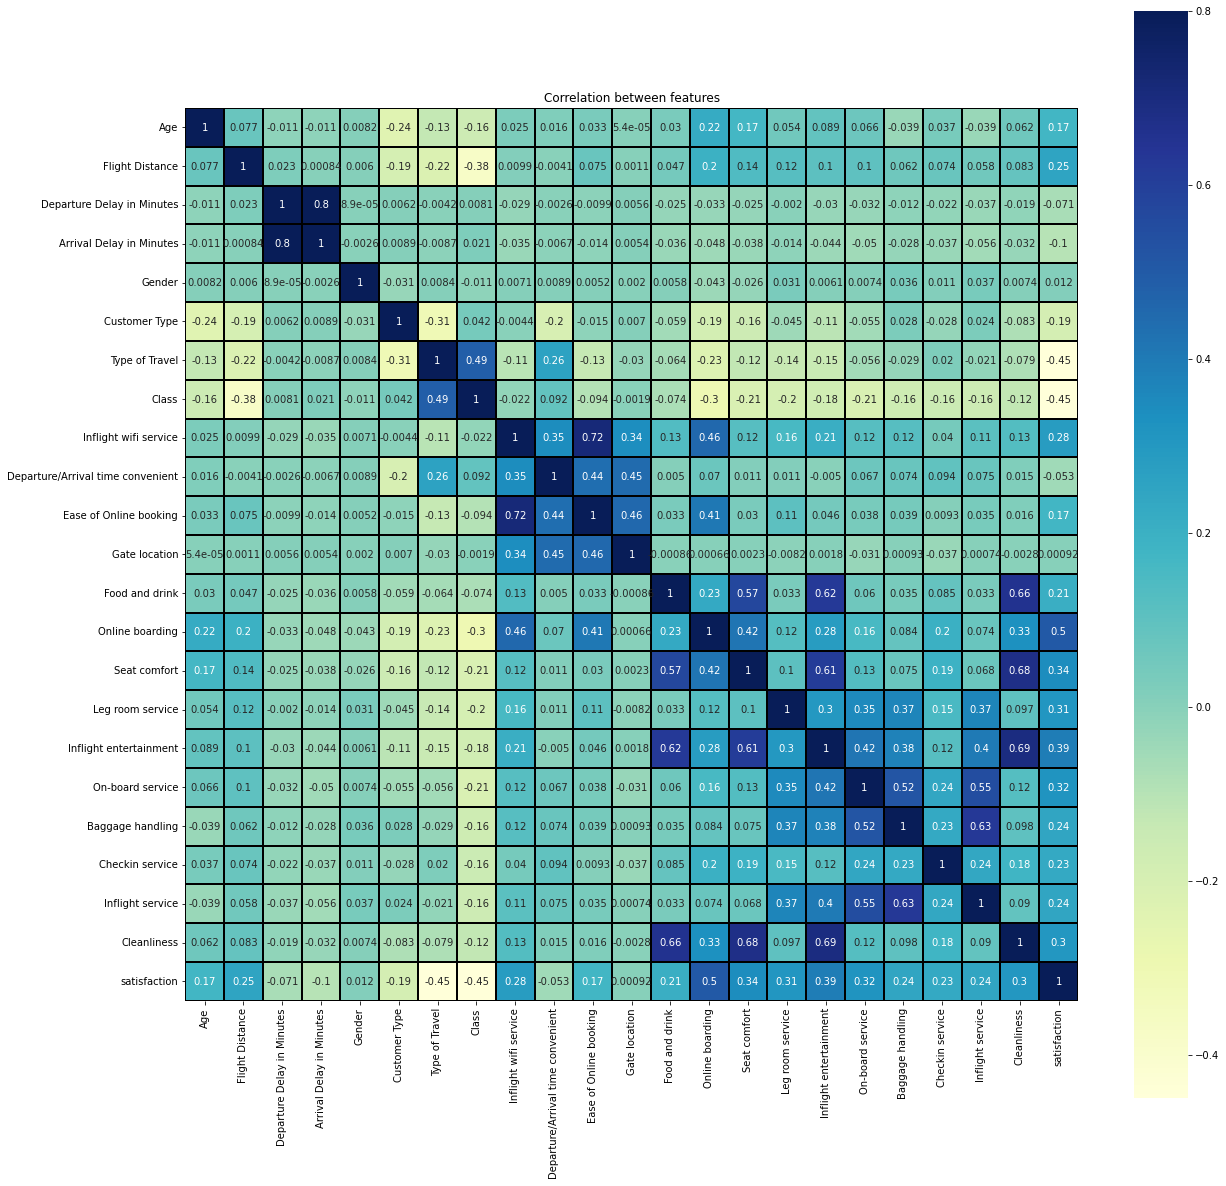

In [60]:
# Correlation plot analysis - Find to what extent the features are correlated to each other
corr = new_cust_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')
# Features are highly correlated to each other

<a name = Section7></a>

---
# **7. Post Data Processing**
---

<a name = Section73></a>
### **7.1 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development.

In [61]:
# Split Train data into depedent & independent variables
x = new_cust_train.drop('satisfaction', axis = 1)
y = new_cust_train['satisfaction']

In [66]:
# Feature selection using Random Forest
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1),threshold=0.02)
selector.fit(x, y)

# Extracting list of important features
selected_feat = x.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 16
Threshold set by Model: 0.02
Features: ['Age', 'Flight Distance', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Ease of Online booking', 'Online boarding', 'Seat comfort', 'Leg room service', 'Inflight entertainment', 'On-board service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


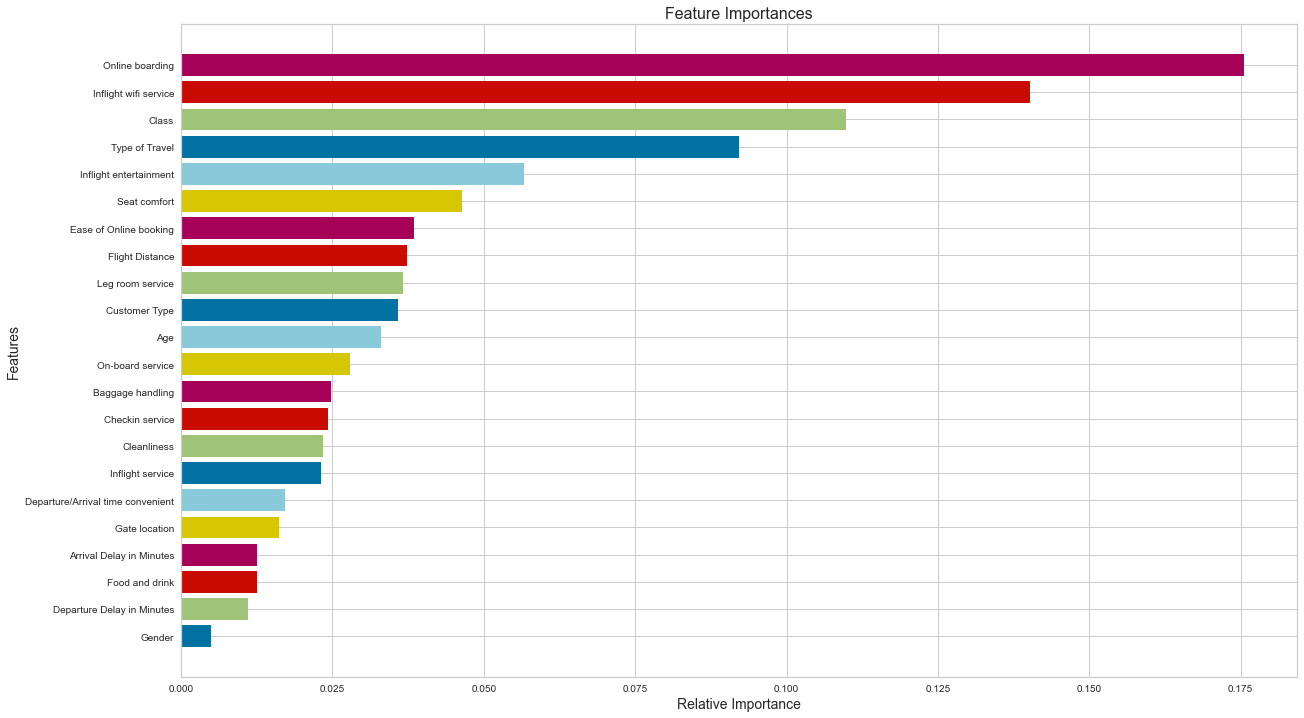

In [67]:
# Visualization of feature inportance

figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()
# Only 16 features have some degree on importance in the customer satisfaction

In [68]:
# Split the data as per filteres features selected
x = new_cust_train[selected_feat]
y = new_cust_train['satisfaction']

In [69]:
# Split Train data into sub train & test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(66498, 16)
(16625, 16)
(66498,)
(16625,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Random Forest model** 

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Accuracy**, **Precision** and **Recall** scores.



In [70]:
# Implement random forest model
rf = RandomForestClassifier(n_estimators=200,min_samples_split=5,max_depth=7,criterion='gini')
rf.fit(x_train, y_train)
y_hat_train = rf.predict(x_train)
y_hat_test = rf.predict(x_test)

In [71]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  cm_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('The Accuracy of the model is: ', acc_score)
  print(cm_matrix)
  print(clas_rep)

In [72]:
# Evaluate Random Forest on Train model
model_eval(y_train, y_hat_train)

The Accuracy of the model is:  0.9362988360552197
[[35732  1916]
 [ 2320 26530]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     37648
           1       0.93      0.92      0.93     28850

    accuracy                           0.94     66498
   macro avg       0.94      0.93      0.94     66498
weighted avg       0.94      0.94      0.94     66498



In [73]:
# Evaluate Random Forest on Test Model
model_eval(y_test, y_hat_test)

The Accuracy of the model is:  0.9331729323308271
[[8875  481]
 [ 630 6639]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9356
           1       0.93      0.91      0.92      7269

    accuracy                           0.93     16625
   macro avg       0.93      0.93      0.93     16625
weighted avg       0.93      0.93      0.93     16625



Observations of **Confustion Matrix**

- **Train Data**:

- Model predicted **35732** instances correctly for positive class while **26530** instances were predicted correctly for negative class.
- Model identified **1916** instance positve but in actual they were negtaive.
- Model identified **2320** instances negative but in actual they were positive.



- **Test Data**:

- Model predicted **8875** instances correctly for positive class while **6639** instances were predicted correctly for negative class.
- Model identified **481** instance positve but in actual they were negtaive.
- Model identified **630** instances negative but in actual they were positive.


In [75]:
# Application of the model on test data
print('Data Shape:', new_cust_test.shape)
new_cust_test.head()

Data Shape: (20781, 22)


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Leg room service,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3.73767,5.71703,0.00000,0.00000,1,0,0,1,5,3,3,2,5,5,4,3,5,4,2,4,5,5
1,2.94444,5.97126,2.89037,2.89037,0,0,0,0,1,5,5,4,1,1,0,3,1,4,2,0,4,1
2,2.63906,6.34564,0.00000,0.00000,0,0,1,2,2,4,2,2,1,2,0,4,1,5,3,4,5,1
3,3.17805,4.70048,0.00000,0.00000,1,1,0,1,1,0,1,0,3,1,0,5,3,2,4,2,1,3
4,3.17805,4.43082,0.00000,0.00000,1,0,1,0,4,5,0,2,5,0,4,5,5,3,3,2,5,5


In [76]:
# Filtering the test data based on the features selected by Random Forest Selector
final_cust_test = new_cust_test[['Age', 'Flight Distance', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Ease of Online booking', 'Online boarding', 'Seat comfort', 'Leg room service', 'Inflight entertainment', 'On-board service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']].copy()
print('Data Shape:', final_cust_test.shape)
final_cust_test.head() 

Data Shape: (20781, 16)


,Age,Flight Distance,Customer Type,Type of Travel,Class,Inflight wifi service,Ease of Online booking,Online boarding,Seat comfort,Leg room service,Inflight entertainment,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3.73767,5.71703,0,0,1,5,3,5,4,3,5,4,2,4,5,5
1,2.94444,5.97126,0,0,0,1,5,1,0,3,1,4,2,0,4,1
2,2.63906,6.34564,0,1,2,2,2,2,0,4,1,5,3,4,5,1
3,3.17805,4.70048,1,0,1,1,1,1,0,5,3,2,4,2,1,3
4,3.17805,4.43082,0,1,0,4,0,0,4,5,5,3,3,2,5,5


In [77]:
#Find the Precited values of customer satisfaction variable of test data
preds_val = rf.predict(final_cust_test)
preds_val

array([1, 0, 0, ..., 1, 0, 1])

In [78]:
# Adding the predicted values of satisfaction variable to original test data:
cust_test['satisfaction'] = preds_val
print('Data Shape:', cust_test.shape)
cust_test.head()

Data Shape: (20781, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,23509,Male,Loyal Customer,41,Business travel,Eco,303,5,3,3,3,5,5,5,5,4,3,3,5,5,5,0,0.00000,1
1,31011,Female,Loyal Customer,18,Business travel,Business,391,1,5,5,5,1,1,1,1,4,3,3,1,4,1,17,17.00000,0
2,29345,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,2,3,1,2,1,1,5,4,4,5,5,1,0,0.00000,0
3,50242,Male,disloyal Customer,23,Business travel,Eco,109,1,0,1,1,3,1,1,3,2,5,5,3,1,3,0,0.00000,0
4,22244,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,0,3,5,0,5,5,3,5,4,3,5,5,0,0.00000,0


In [79]:
# Applyinh the text label to the precited values of " satisfaction" :
cust_test['satisfaction'] = np.where(cust_test['satisfaction']==1,'satisfied','neutral or dissatisfied')
print('Data Shape:', cust_test.shape)
cust_test.head()

Data Shape: (20781, 24)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,23509,Male,Loyal Customer,41,Business travel,Eco,303,5,3,3,3,5,5,5,5,4,3,3,5,5,5,0,0.00000,satisfied
1,31011,Female,Loyal Customer,18,Business travel,Business,391,1,5,5,5,1,1,1,1,4,3,3,1,4,1,17,17.00000,neutral or dissatisfied
2,29345,Female,Loyal Customer,13,Personal Travel,Eco Plus,569,2,4,2,3,1,2,1,1,5,4,4,5,5,1,0,0.00000,neutral or dissatisfied
3,50242,Male,disloyal Customer,23,Business travel,Eco,109,1,0,1,1,3,1,1,3,2,5,5,3,1,3,0,0.00000,neutral or dissatisfied
4,22244,Male,Loyal Customer,23,Personal Travel,Business,83,4,5,0,3,5,0,5,5,3,5,4,3,5,5,0,0.00000,neutral or dissatisfied


In [80]:
#Preparing the final submission file for predicted values :
final_submission = cust_test[['id','satisfaction']]
print('Data Shape:', final_submission.shape)
final_submission.head()

Data Shape: (20781, 2)


,id,satisfaction
0,23509,satisfied
1,31011,neutral or dissatisfied
2,29345,neutral or dissatisfied
3,50242,neutral or dissatisfied
4,22244,neutral or dissatisfied


In [81]:
# Export Final submission file 
final_submission.to_csv('final_submission.csv', index=False, header=False)

<a name = Section9></a>

---
# **9. Conclusion**
---



- We investigated in depth about the features and found only **16** features which to **retain** and rest were **discarded*.

- We observed **high precision and recall scores** with **Random Forest model**  and it also solved the overfitting issue

- This **model** now can **help us** in **identifying** which flight customers are satisfied and which are not with airline service

- Additionally, this **model** will **help** business **saving** **a lot of resources** (money, human resources etc.).